In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from find_regions import estimate_center_and_width, clean_data, find_regions

## Load data

In [3]:
data_dir = '../data/'
! ls -la $data_dir

total 8608
drwxr-xr-x  12 peterkomar  staff      408 Jun  8 10:55 .
drwxr-xr-x  10 peterkomar  staff      340 Jun  8 13:32 ..
-rw-r--r--@  1 peterkomar  staff   548708 Jun  8 12:48 vial15a_OD.txt
-rw-r--r--@  1 peterkomar  staff      515 Jun  8 10:49 vial15a_pump_log.txt
-rw-r--r--@  1 peterkomar  staff  1015250 Jun  8 10:50 vial15b_OD.txt
-rw-r--r--@  1 peterkomar  staff     4369 Jun  8 10:50 vial15b_pump_log.txt
-rw-r--r--@  1 peterkomar  staff   894367 Jun  8 10:49 vial5_OD.txt
-rw-r--r--@  1 peterkomar  staff     2694 Jun  8 10:49 vial5_pump_log.txt
-rw-r--r--@  1 peterkomar  staff  1014933 Jun  8 10:50 vial6_OD.txt
-rw-r--r--@  1 peterkomar  staff     2836 Jun  8 10:50 vial6_pump_log.txt
-rw-r--r--@  1 peterkomar  staff   900535 Jun  8 10:49 vial8_OD.txt
-rw-r--r--@  1 peterkomar  staff     4692 Jun  8 10:49 vial8_pump_log.txt


In [4]:
files = ! ls $data_dir
data_files = {}
for f in files:
    name = f.split('_')[0]
    typ = '_'.join(f.split('.')[0].split('_')[1:])
    if name not in data_files: data_files[name] = {}
    data_files[name][typ] = os.path.join(data_dir, f)
    
data = {}
for name, files in data_files.items():
    d = {}
    data[name] = d
    d['OD'] = pd.read_csv(files['OD'], sep=',', names=['time', 'OD'], header=0)
    d['pump_log'] = pd.read_csv(files['pump_log'], sep=',', names=['time', 'OD'], header=0)

In [5]:
data.keys()

dict_keys(['vial15a', 'vial15b', 'vial5', 'vial6', 'vial8'])

## Find regions

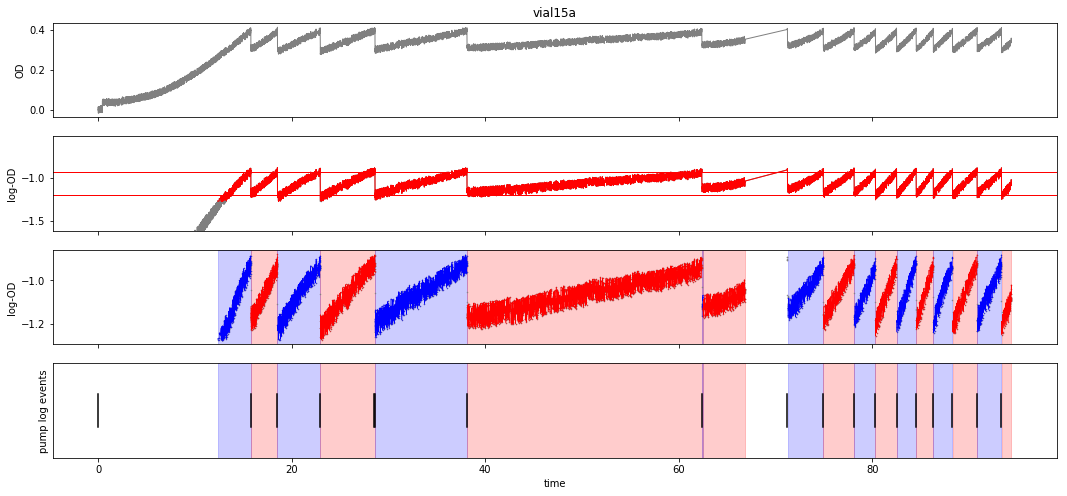

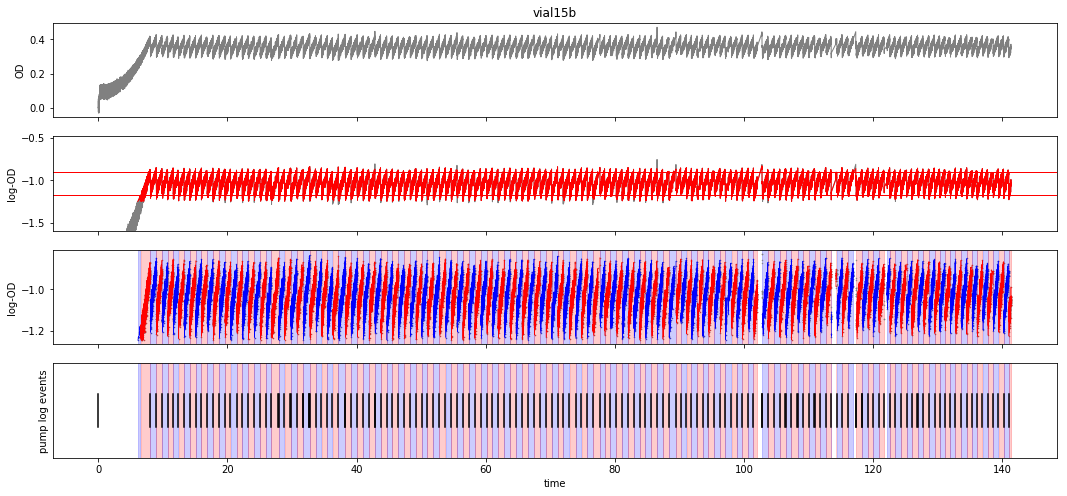

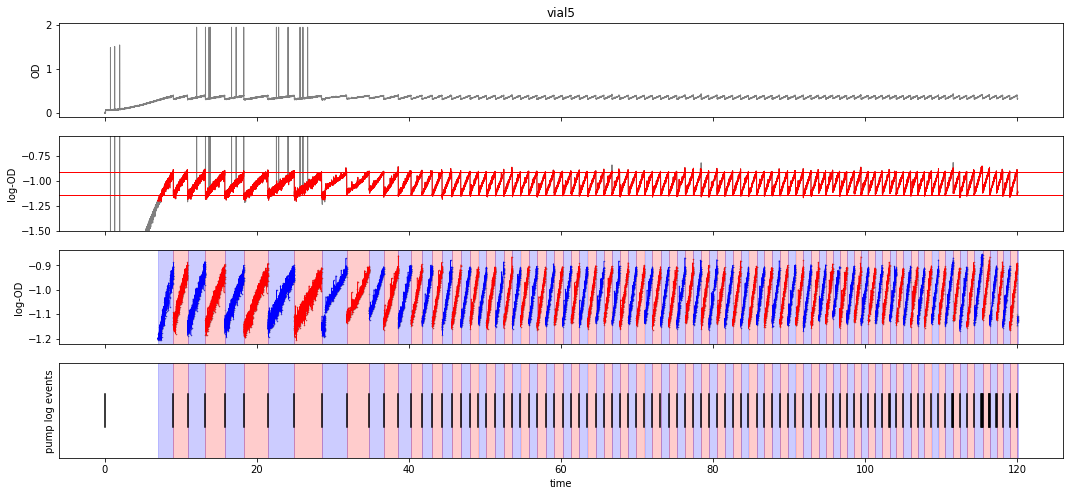

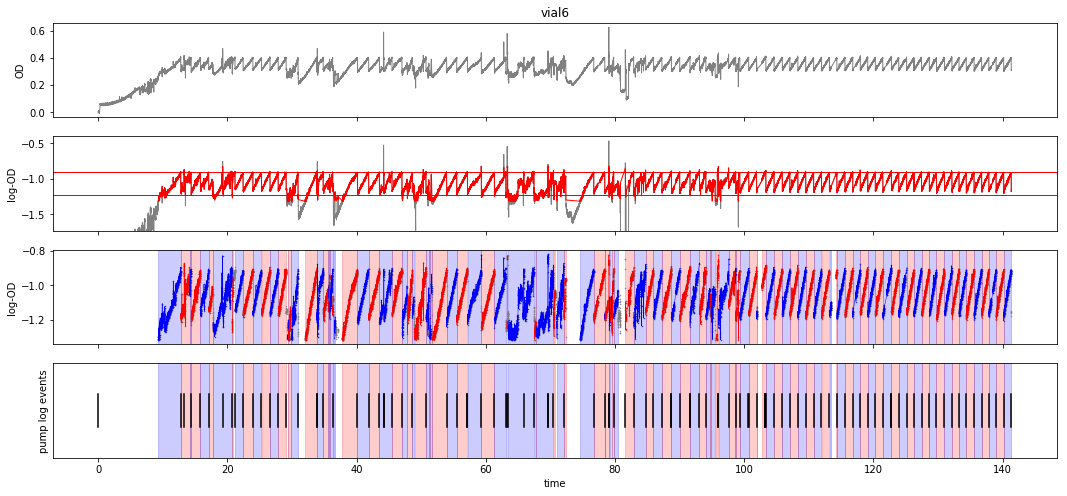

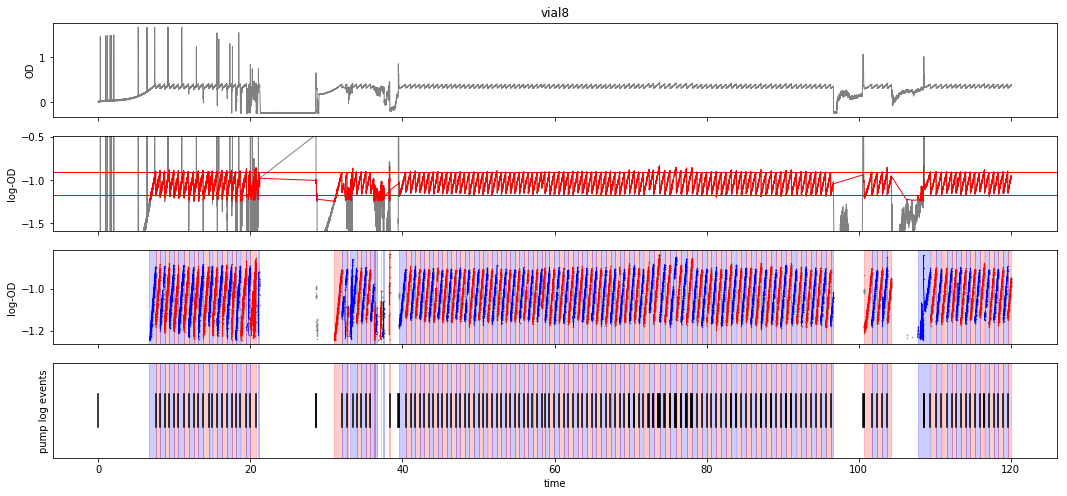

In [18]:
for vial in data.keys():
    time = np.array(data[vial]['OD']['time'])
    od = np.array(data[vial]['OD']['OD'])
    
    log_od_center, log_od_width = estimate_center_and_width(od)
    t, x = clean_data(time, od, log_od_center, log_od_width)
    s, e = find_regions(t, x)
    
# Plotting 
    fig, axes = plt.subplots(4,1, figsize=(18,8), sharex=True)
    
    ax = axes[0]
    ax.plot(time, od, '-', lw=1, color='gray')
    ax.set_title(vial)
    ax.set_ylabel('OD')
    
    ax = axes[1]
    ax.plot(time[od > 0], np.log(od[od > 0]), '-', lw=1, color='gray', )
    ax.plot(t, x, '-', lw=1, color='r', )
    low = log_od_center - log_od_width / 2
    high = log_od_center + log_od_width / 2
    ax.axhline(low, color='r', lw=1)
    ax.axhline(high, color='r', lw=1)
    ax.set_ylim([log_od_center - 2*log_od_width, log_od_center + 2*log_od_width])
    ax.set_ylabel('log-OD')
    
    ax = axes[2]
    ax.plot(t, x, '.', lw=1, color='gray', ms=1)
    colors = ['blue', 'red']
    for r, (sr, er) in enumerate(zip(s, e)):
        color = colors[r % len(colors)]
        ax.axvspan(t[sr], t[er], alpha=0.2, color=color)
        ax.plot(t[sr:er+1], x[sr:er+1], '.-', lw=0.5, ms=0.5, color=color)
    ax.set_ylabel('log-OD')
    
    ax = axes[3]
    colors = ['blue', 'red']
    for r, (sr, er) in enumerate(zip(s, e)):
        color = colors[r % len(colors)]
        ax.axvspan(t[sr], t[er], alpha=0.2, color=color)
    for jump_time in data[vial]['pump_log']['time']:
        ax.axvline(jump_time, ymin=0.33, ymax=0.67, color='k')
    ax.set_ylabel([0, 1])
    ax.set_yticks([])
    ax.set_xlabel('time')
    ax.set_ylabel('pump log events')
    
    plt.show()